# COMP4115: Exploratory Data Analysis and Visualization
# Lab 7. Usage of scikit-learn for Data Clustering

In this lab, we are going to learn the usages of k-mean clustering and hierarchical clustering in scikit-learn.

## 1. Implementation of *k*-means algorithm
The *k*-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

###  *k*-Means algorithm
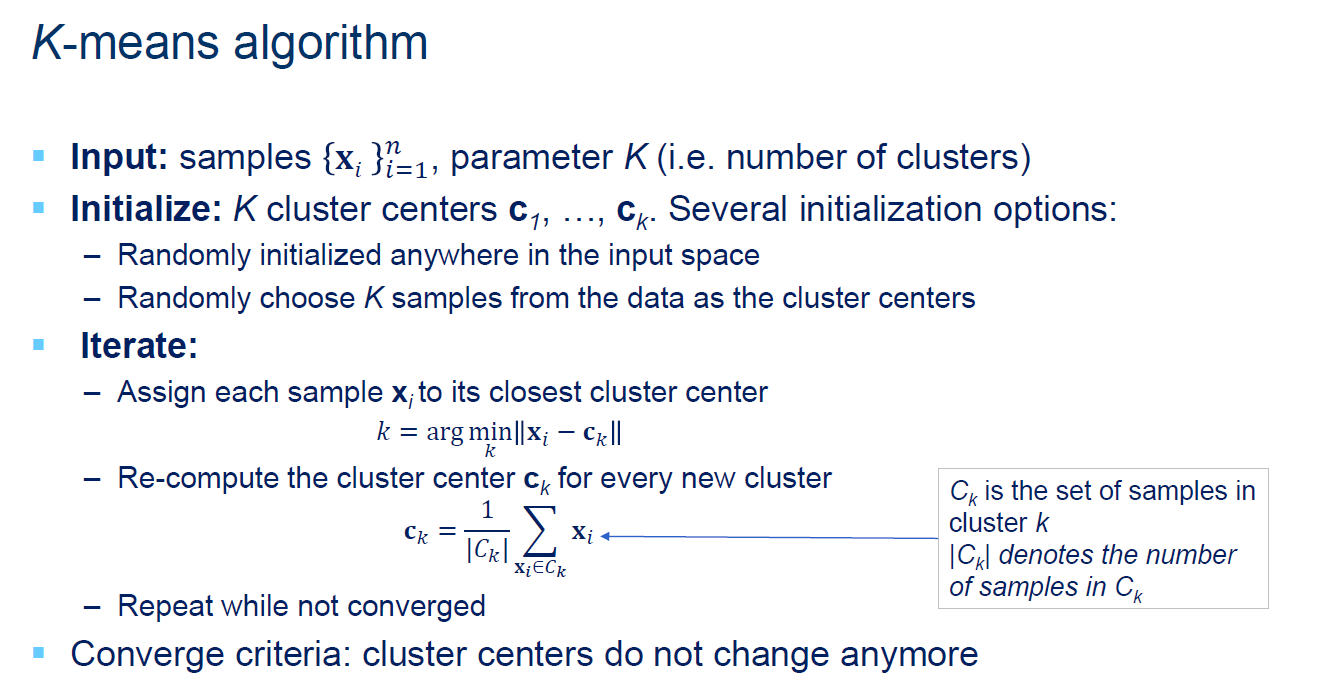

### 1.1 An implementation of k-means algorithm

The *k*-Means algorithm is simple enough that we can write it in a few lines of code. The following is a very basic implementation of *k*-Means algorithm by using the 'pairwise_distances_argmin' function from sklearn. 

'pairwise_distances_argmin(X, centers)' computes for each row in 'X', the index of the row of 'centers' which is closest. The detail of this function can be found in https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html

In [21]:
from sklearn.metrics import pairwise_distances_argmin
import numpy as np

def my_k_means(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        cluster_labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[cluster_labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, cluster_labels


         x1        x2
0  0.836857  2.136359
1 -1.413658  7.409623
2  1.155213  5.099619
3 -1.018616  7.814915
4  1.271351  1.892542


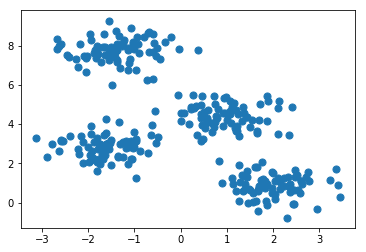

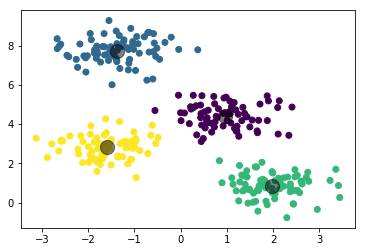

In [22]:
# test our k-means algorithm
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data.csv')
print(df.head(5))
X = df.values
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50);

centers, cluster_labels = my_k_means(X, 4)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels);
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## 2: Usage of scikit-learn for Data Clustering

### 2.1 *K*-means clustering

[2 0 1 0 2 2 3 1 0 0 3 0 1 0 2 1 1 2 3 3 2 2 1 3 3 1 2 1 3 1 0 0 1 0 0 0 0
 0 3 2 1 3 1 1 3 3 0 3 0 2 3 2 0 2 2 3 0 3 0 2 0 1 0 3 3 3 0 2 0 3 1 3 0 3
 3 0 3 1 2 0 2 1 2 2 0 1 2 1 0 0 1 2 0 3 3 1 2 2 1 3 0 2 0 2 1 2 2 1 0 1 3
 3 2 0 2 1 0 2 2 1 3 2 3 2 2 2 2 3 2 3 0 3 3 2 0 3 3 0 1 0 0 3 1 3 1 3 0 1
 0 0 0 1 0 1 2 3 0 3 2 1 0 1 1 2 1 3 3 1 2 1 1 0 2 1 3 0 2 2 1 3 2 1 3 3 1
 1 1 1 2 0 1 3 1 1 3 3 3 1 3 0 1 3 2 3 1 0 3 0 1 0 1 3 1 1 0 3 3 2 2 1 0 2
 2 3 2 3 1 0 0 1 1 0 1 2 3 1 2 3 0 3 2 1 2 0 0 0 0 3 3 0 1 3 2 1 3 3 3 2 2
 0 1 1 3 2 0 3 1 0 1 2 2 3 3 1 2 2 2 1 0 0 2 2 1 2 2 2 0 3 0 1 2 2 0 0 0 2
 2 1 0 3]


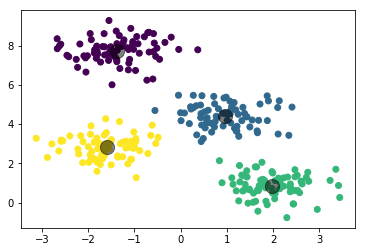

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### 2.2 Hierachical Clustering

Agglomerative
   1. Start with each sample in its own singleton cluster. 
   2. At each step, greedily merge the two closest clusters.
   3. Stop when there is a single cluster of all samples

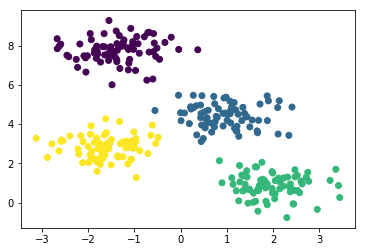

In [24]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=4)
cluster_labels = agg.fit_predict(X)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels);

### 2.3 Visualization of Hierarchical Clustering by Dendrogram (An example)
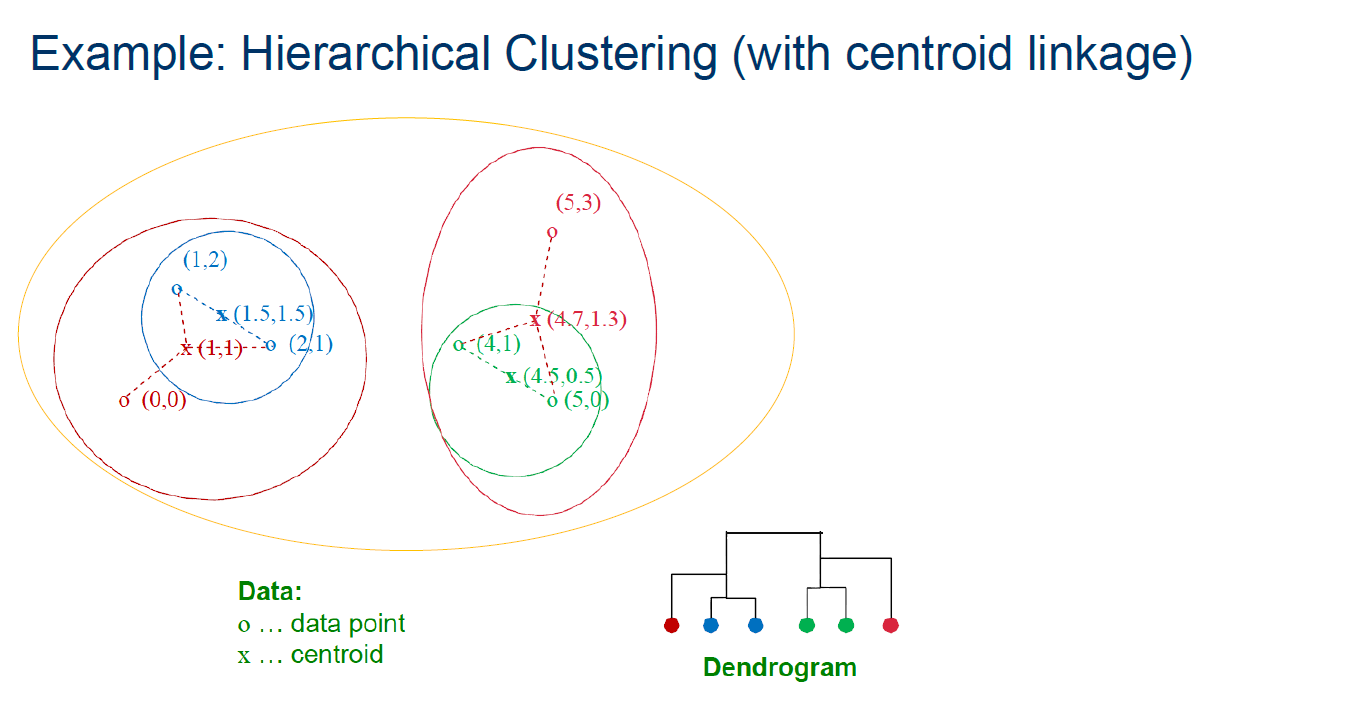

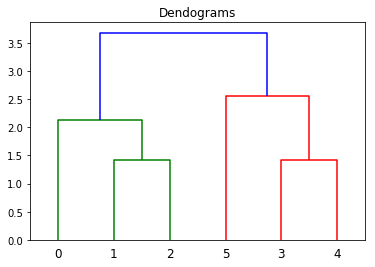

In [25]:
import scipy.cluster.hierarchy as shc


data = np.array([[0,0],[1,2],[2,1],[4,1],[5,0],[5,3]])
plt.title("Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='centroid'))

## 3: Case study: Color Quantization using K-Means

Performs a pixel-wise Vector Quantization (VQ) of an input image, reducing the number of colors required to show the image to a small number of colors, while preserving the overall appearance quality.

Image Widht: 210
Image Height: 400
Channels/Dimension: 3
(210, 400, 3)


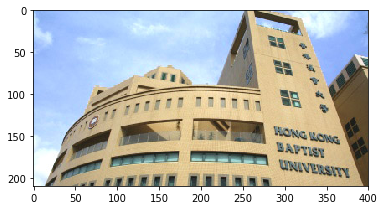

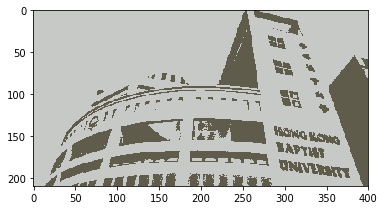

In [26]:
from skimage import io
image = io.imread('hkbu2.jpg')
plt.figure()
plt.imshow(image)

#print(image)

width, height, depth = image.shape
print("Image Widht:",width)
print("Image Height:",height)
print("Channels/Dimension:",depth)

reshaped_image = np.reshape(image, (width * height, depth))

n_color = 2
model = KMeans(n_clusters=n_color)
labels = model.fit_predict(reshaped_image)
cluster = model.cluster_centers_

quantized_image = np.reshape(cluster[labels], (width, height, cluster.shape[1])).astype('uint8')

print(quantized_image.shape)
plt.figure()
plt.imshow(quantized_image);

(210, 400, 3)


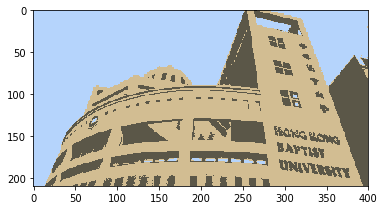

In [27]:
n_color = 3
model = KMeans(n_clusters=n_color)
labels = model.fit_predict(reshaped_image)
cluster = model.cluster_centers_

quantized_image = np.reshape(cluster[labels], (width, height, cluster.shape[1])).astype('uint8')

print(quantized_image.shape)
plt.figure()
plt.imshow(quantized_image);